<a href="https://colab.research.google.com/github/AhmedNasser1601/Predictive-Maintenance/blob/Main/Predictive-Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AhmedNasser1601/Predictive-Maintenance/Main/ai4i2020.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000




---


## Preprocessing

In [5]:
df.drop(["UDI", "Product ID","RNF","OSF","PWF","HDF","TWF"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


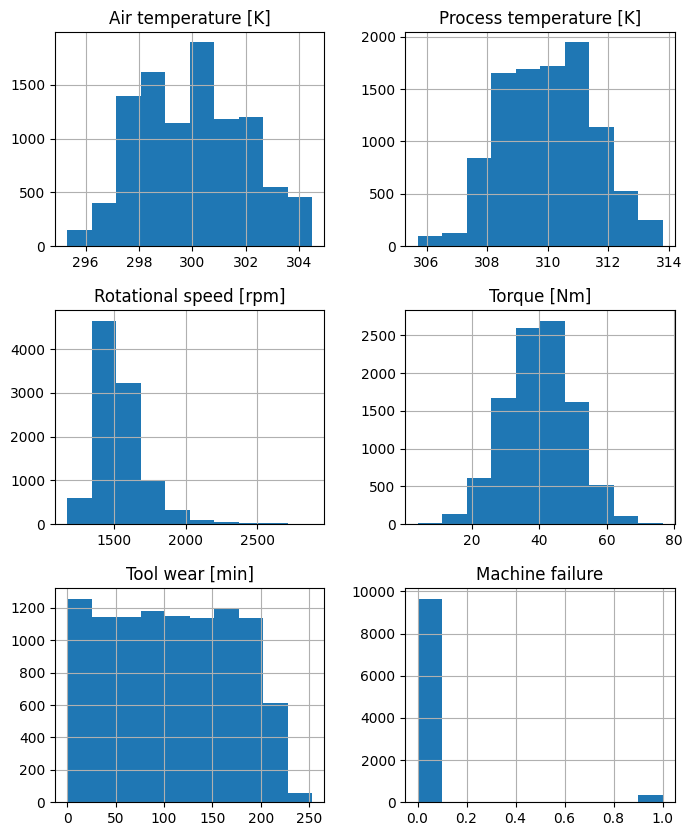

In [6]:
df.hist(figsize=(8, 10))
plt.show()

In [7]:
# Transform Categorical Values
df = pd.get_dummies(df, columns=['Type'])

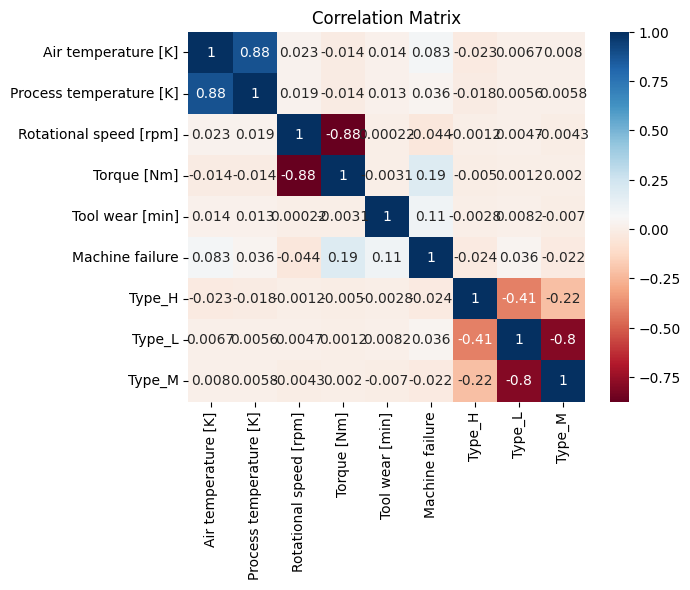

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Normalization
col = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[col] = StandardScaler().fit_transform(df[col])
df[col]

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588
...,...,...,...,...,...
9995,-0.602417,-1.082162,0.363820,-1.052012,-1.476034
9996,-0.552421,-1.082162,0.520005,-0.821283,-1.428902
9997,-0.502425,-0.947360,0.592519,-0.660777,-1.350349
9998,-0.502425,-0.879959,-0.729472,0.854005,-1.303217


In [10]:
# Re-Format columns name
df.columns = df.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_')

<ipython-input-10-11ae2ddbba19>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_')
<ipython-input-10-11ae2ddbba19>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_')


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
  df.drop(['Machine failure'], axis=1),
  df['Machine failure'],
  test_size=0.2,
  random_state=42
)

In [12]:
def plot_roc_curve(y_true, y_probs, model_name=''):
  fpr, tpr, thresholds = roc_curve(y_true, y_probs)

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr)
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title(f'ROC Curve : {model_name}\n(AUC = {auc(fpr, tpr) * 100:.2f} %)')
  plt.show()



---


## XGBClassifier

In [13]:
xgb_model = XGBClassifier().fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print(f'XGBClassifier (Accuracy)=> {accuracy_score(y_test, y_pred)*100:.2f} %')

XGBClassifier (Accuracy)=> 98.45 %


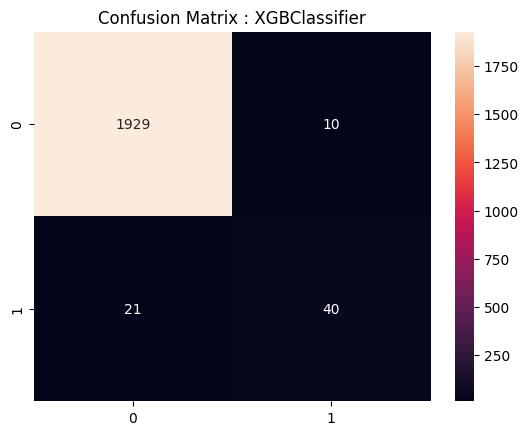

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix : XGBClassifier')
plt.show()

In [15]:
print(f"Feature Importance : XGBClassifier\n{pd.Series(xgb_model.feature_importances_, index=df.drop(['Machine failure'], axis=1).columns)}")

Feature Importance : XGBClassifier
Air temperature _K_        0.150333
Process temperature _K_    0.105904
Rotational speed _rpm_     0.147297
Torque _Nm_                0.229470
Tool wear _min_            0.131601
Type_H                     0.051390
Type_L                     0.136302
Type_M                     0.047703
dtype: float32


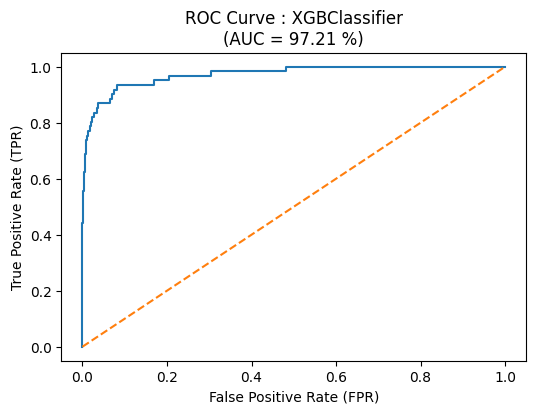

In [16]:
plot_roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1], model_name='XGBClassifier')



---


## RandomForest

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(f'RandomForest (Accuracy)=> {accuracy_score(y_test, y_pred)*100:.2f} %')

RandomForest (Accuracy)=> 98.40 %


In [18]:
print(f'Classification Report : RandomForest\n{classification_report(y_test, y_pred)}')

Classification Report : RandomForest
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.85      0.57      0.69        61

    accuracy                           0.98      2000
   macro avg       0.92      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000



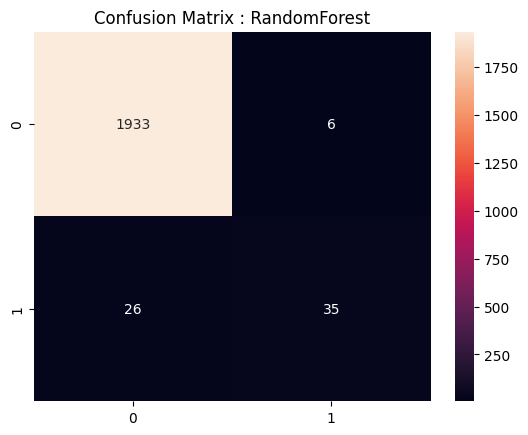

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix : RandomForest')
plt.show()

In [20]:
print(f"Feature Importance : RandomForest\n{pd.Series(rf_model.feature_importances_, index=df.drop(['Machine failure'], axis=1).columns)}")

Feature Importance : RandomForest
Air temperature _K_        0.136492
Process temperature _K_    0.125774
Rotational speed _rpm_     0.236599
Torque _Nm_                0.302621
Tool wear _min_            0.173507
Type_H                     0.005681
Type_L                     0.010196
Type_M                     0.009130
dtype: float64


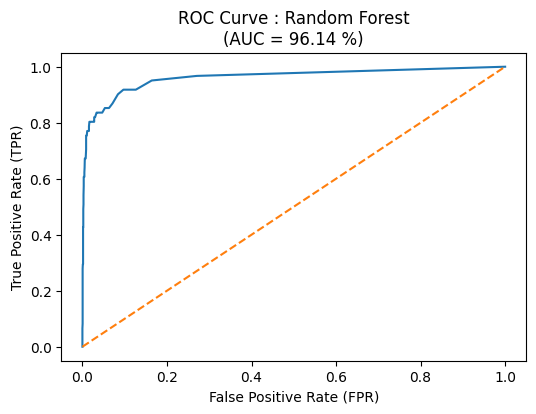

In [21]:
plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], model_name='Random Forest')



---


## SVM

In [22]:
svm_model = SVC(kernel='linear', probability=True, C=1, random_state=42).fit(X_train, y_train)


y_pred = svm_model.predict(X_test)
print(f'SVM (Accuracy)=> {accuracy_score(y_test, y_pred)*100:.2f} %')

SVM (Accuracy)=> 96.95 %


In [23]:
print(f'Classification Report : SVM\n{classification_report(y_test, y_pred)}')

Classification Report : SVM
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.00      0.00      0.00        61

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print(f"Feature Importance : SVM\n{pd.Series(svm_model.coef_[0], index=df.drop(['Machine failure'], axis=1).columns)}")

Feature Importance : SVM
Air temperature _K_        0.000191
Process temperature _K_   -0.000188
Rotational speed _rpm_     0.000167
Torque _Nm_                0.000282
Tool wear _min_            0.000087
Type_H                    -0.000144
Type_L                     0.000095
Type_M                     0.000049
dtype: float64


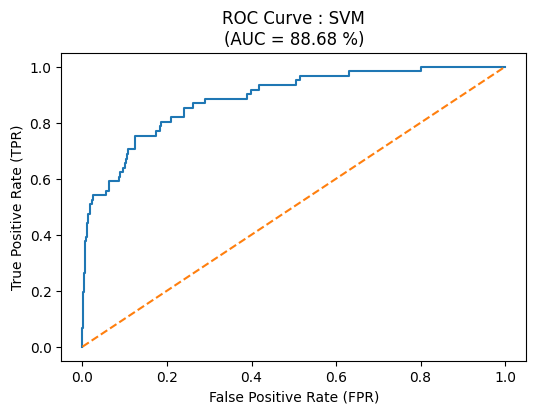

In [25]:
plot_roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1], model_name='SVM')



---

